<a href="https://colab.research.google.com/github/zyfer416/Construction-analysis/blob/main/yolov8_object_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦾 YOLOv8 Object Detection in Google Colab
This notebook loads a custom-trained YOLOv8 model, runs object detection on an uploaded image, and displays the results.

In [7]:
# ✅ Step 1: Install YOLOv8 (Ultralytics)
!pip install -q ultralytics

# ✅ Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 888.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=

In [2]:
# ✅ Step 3: Unzip your Roboflow-labeled YOLOv8 Dataset
import zipfile
import os

# Make sure your dataset zip is in this path (adjust if needed)
zip_path = '/content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA/Construction Site Object Detecti.v1i.yolov8.zip'
extract_path = '/content/drive/MyDrive/CONSTRUCTION DATASET/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if dataset is unzipped correctly
os.listdir(extract_path)


['train', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt']

In [3]:
data_yaml_path = '/content/drive/MyDrive/CONSTRUCTION DATASET/dataset/data.yaml'

yaml_content = """\
path: /content/drive/MyDrive/CONSTRUCTION DATASET/dataset
train: train/images
val: train/images

nc: 15
names: [worker, helmet, scaffolding, brick_stack, construction_sign, mixer, toolbox, rebar, crane, cement_bag, bulldozer, blueprint, foundation, building_frame, fence]
"""

with open(data_yaml_path, 'w') as f:
    f.write(yaml_content)


In [4]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # or use yolov8m.pt, yolov8l.pt etc.

model.train(
    data=data_yaml_path,
    epochs=70,
    imgsz=640,
    batch=8,
    project='/content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA',
    name='predict',
)


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/CONSTRUCTION DATASET/dataset/data.yaml, epochs=70, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA, name=predict2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

train: Scanning /content/drive/MyDrive/CONSTRUCTION DATASET/dataset/train/labels.cache... 709 images, 21 backgrounds, 0 corrupt: 100%|██████████| 709/709 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/CONSTRUCTION DATASET/dataset/train/labels.cache... 709 images, 21 backgrounds, 0 corrupt: 100%|██████████| 709/709 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA/predict2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA/predict2
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.05G     0.9022      3.675      1.372         17        640: 100%|██████████| 89/89 [00:22<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.85it/s]


                   all        709       1319      0.368       0.22      0.156      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.49G     0.7965      2.229      1.292         27        640: 100%|██████████| 89/89 [00:19<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.39it/s]


                   all        709       1319      0.516      0.295      0.262      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.51G     0.8077      2.015      1.295         18        640: 100%|██████████| 89/89 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.12it/s]


                   all        709       1319      0.572      0.278      0.257      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.51G     0.8152      1.967      1.304         21        640: 100%|██████████| 89/89 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.36it/s]


                   all        709       1319      0.489      0.273       0.26        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      2.51G     0.8015      1.793      1.289         21        640: 100%|██████████| 89/89 [00:19<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.29it/s]


                   all        709       1319      0.376      0.333      0.264        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.53G     0.8064      1.793      1.308          9        640: 100%|██████████| 89/89 [00:20<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.94it/s]


                   all        709       1319      0.435      0.329      0.282      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.56G      0.779      1.749      1.278         21        640: 100%|██████████| 89/89 [00:21<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]


                   all        709       1319      0.493      0.304      0.332      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.59G     0.7684      1.688      1.289         20        640: 100%|██████████| 89/89 [00:20<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.65it/s]


                   all        709       1319      0.418      0.388      0.371      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.63G     0.7623      1.643      1.284         22        640: 100%|██████████| 89/89 [00:21<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.27it/s]


                   all        709       1319      0.634      0.391      0.403      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.65G      0.719      1.577      1.238         19        640: 100%|██████████| 89/89 [00:22<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.82it/s]


                   all        709       1319       0.61      0.391      0.437      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.65G     0.7163      1.517      1.236         18        640: 100%|██████████| 89/89 [00:20<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.45it/s]


                   all        709       1319      0.614      0.397      0.459      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.67G     0.7034      1.528      1.238         25        640: 100%|██████████| 89/89 [00:20<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.68it/s]

                   all        709       1319      0.638      0.421      0.451      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.67G     0.6727      1.434      1.192         17        640: 100%|██████████| 89/89 [00:21<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.40it/s]


                   all        709       1319       0.69      0.426       0.48       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.67G      0.669      1.422      1.205         19        640: 100%|██████████| 89/89 [00:22<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.98it/s]

                   all        709       1319      0.705      0.481      0.543      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.67G     0.6554      1.336      1.188         17        640: 100%|██████████| 89/89 [00:20<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.69it/s]


                   all        709       1319      0.663      0.505      0.535      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.67G     0.6585      1.335      1.194         17        640: 100%|██████████| 89/89 [00:19<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.65it/s]


                   all        709       1319      0.608      0.465      0.522      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.67G      0.643      1.356      1.182         17        640: 100%|██████████| 89/89 [00:19<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.79it/s]

                   all        709       1319      0.629      0.587      0.593      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.67G     0.6352      1.299      1.175         19        640: 100%|██████████| 89/89 [00:21<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.35it/s]


                   all        709       1319      0.691      0.526      0.583      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.67G     0.6285      1.224      1.169         12        640: 100%|██████████| 89/89 [00:20<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.46it/s]

                   all        709       1319      0.665      0.566      0.597      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.67G     0.6233      1.229      1.169         27        640: 100%|██████████| 89/89 [00:21<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.78it/s]

                   all        709       1319      0.688       0.64      0.665      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.67G     0.5969      1.248      1.153         23        640: 100%|██████████| 89/89 [00:20<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.75it/s]

                   all        709       1319      0.748      0.542      0.638      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.67G     0.5889      1.145      1.142         16        640: 100%|██████████| 89/89 [00:19<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.65it/s]

                   all        709       1319      0.713      0.561      0.667      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.67G     0.5708      1.138      1.128         20        640: 100%|██████████| 89/89 [00:21<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.35it/s]

                   all        709       1319      0.709      0.639      0.696      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.67G     0.5735       1.15      1.139         18        640: 100%|██████████| 89/89 [00:20<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.84it/s]

                   all        709       1319      0.637       0.71      0.738        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.67G     0.5565       1.06      1.124         15        640: 100%|██████████| 89/89 [00:20<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.75it/s]

                   all        709       1319      0.681      0.716      0.723      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.67G     0.5587      1.066      1.124         23        640: 100%|██████████| 89/89 [00:19<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.66it/s]

                   all        709       1319      0.737      0.705      0.765      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.67G     0.5563      1.054      1.118         21        640: 100%|██████████| 89/89 [00:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.36it/s]

                   all        709       1319      0.774      0.706      0.779      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.67G     0.5487      1.036       1.11         15        640: 100%|██████████| 89/89 [00:20<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.20it/s]

                   all        709       1319      0.737      0.747      0.791      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.67G     0.5282     0.9408      1.101         19        640: 100%|██████████| 89/89 [00:21<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.65it/s]

                   all        709       1319      0.781      0.741      0.792      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.67G     0.5255     0.9661      1.105         27        640: 100%|██████████| 89/89 [00:20<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.75it/s]

                   all        709       1319      0.748      0.727      0.784      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.67G     0.5255     0.9741      1.098         23        640: 100%|██████████| 89/89 [00:19<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.84it/s]

                   all        709       1319      0.845      0.738      0.825      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.67G     0.5153     0.9475      1.088         19        640: 100%|██████████| 89/89 [00:21<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.12it/s]


                   all        709       1319      0.785       0.72      0.774      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.67G     0.5192     0.9346      1.087         19        640: 100%|██████████| 89/89 [00:19<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.70it/s]

                   all        709       1319      0.835      0.768      0.831      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.67G     0.4996     0.8778      1.077         15        640: 100%|██████████| 89/89 [00:20<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]

                   all        709       1319      0.799      0.787      0.842      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      2.67G     0.4843     0.8938      1.076         14        640: 100%|██████████| 89/89 [00:21<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.17it/s]

                   all        709       1319      0.821      0.777      0.861      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.67G     0.4953     0.8666      1.073         25        640: 100%|██████████| 89/89 [00:21<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.21it/s]

                   all        709       1319      0.806      0.808      0.861      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.67G     0.4779     0.8362      1.066         24        640: 100%|██████████| 89/89 [00:20<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.64it/s]

                   all        709       1319      0.766      0.882      0.874       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.67G     0.4747     0.8555      1.061         19        640: 100%|██████████| 89/89 [00:20<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.71it/s]

                   all        709       1319       0.79      0.848      0.898      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.67G     0.4831     0.7689      1.063         19        640: 100%|██████████| 89/89 [00:21<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.50it/s]

                   all        709       1319      0.846      0.823      0.899      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.67G     0.4728     0.8148      1.054         22        640: 100%|██████████| 89/89 [00:21<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.75it/s]


                   all        709       1319      0.874       0.83      0.898      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.67G      0.473     0.7827      1.058         18        640: 100%|██████████| 89/89 [00:19<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.66it/s]

                   all        709       1319      0.861      0.842      0.891      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.67G     0.4598     0.7733      1.061         25        640: 100%|██████████| 89/89 [00:20<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]

                   all        709       1319      0.852       0.88       0.92      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.67G     0.4611     0.7478      1.052         19        640: 100%|██████████| 89/89 [00:21<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.25it/s]

                   all        709       1319      0.924      0.871      0.939      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.67G     0.4565      0.758       1.05         16        640: 100%|██████████| 89/89 [00:21<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.68it/s]

                   all        709       1319      0.904      0.859      0.939      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.67G     0.4315     0.7051       1.03         31        640: 100%|██████████| 89/89 [00:20<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.65it/s]

                   all        709       1319      0.909      0.854      0.918      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.67G      0.437     0.7256       1.03         14        640: 100%|██████████| 89/89 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.68it/s]

                   all        709       1319      0.881      0.841      0.911       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      2.67G     0.4336      0.701      1.031         22        640: 100%|██████████| 89/89 [00:19<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.06it/s]

                   all        709       1319      0.916      0.851      0.936      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.67G     0.4208     0.6948       1.03         20        640: 100%|██████████| 89/89 [00:20<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.45it/s]

                   all        709       1319      0.904       0.86      0.936      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.67G      0.425     0.6731      1.025         19        640: 100%|██████████| 89/89 [00:21<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.09it/s]


                   all        709       1319      0.906      0.883      0.932      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.67G      0.414     0.6781      1.013         20        640: 100%|██████████| 89/89 [00:20<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.66it/s]

                   all        709       1319      0.851      0.909      0.932      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.67G     0.4113     0.6698      1.021         29        640: 100%|██████████| 89/89 [00:20<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.77it/s]

                   all        709       1319      0.838      0.931      0.915      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.67G     0.4116     0.6543      1.018         15        640: 100%|██████████| 89/89 [00:19<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.14it/s]

                   all        709       1319      0.907      0.906      0.936      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.67G     0.4183     0.6365      1.009         19        640: 100%|██████████| 89/89 [00:21<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.04it/s]

                   all        709       1319      0.923      0.874       0.94      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.67G     0.3899     0.6121      1.007         20        640: 100%|██████████| 89/89 [00:20<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]

                   all        709       1319      0.907      0.892      0.941       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.67G      0.396     0.6403      1.018         10        640: 100%|██████████| 89/89 [00:20<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.70it/s]

                   all        709       1319      0.881      0.912       0.95      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.67G     0.3942     0.5813      1.006         18        640: 100%|██████████| 89/89 [00:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.47it/s]

                   all        709       1319      0.901      0.912      0.953      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.67G     0.3818      0.598      1.007         16        640: 100%|██████████| 89/89 [00:21<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.53it/s]

                   all        709       1319      0.916       0.92      0.961      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.67G     0.3794     0.5693      1.001         24        640: 100%|██████████| 89/89 [00:20<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.67it/s]

                   all        709       1319      0.906      0.934      0.965      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.67G     0.3831     0.5652      1.008         26        640: 100%|██████████| 89/89 [00:19<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.65it/s]

                   all        709       1319      0.925      0.929      0.962      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.67G     0.3737     0.5541     0.9918         28        640: 100%|██████████| 89/89 [00:21<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.34it/s]

                   all        709       1319      0.942      0.923      0.962      0.882


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.67G       0.37     0.5315     0.9933         11        640: 100%|██████████| 89/89 [00:20<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.66it/s]

                   all        709       1319      0.951      0.902      0.963      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.67G     0.3552      0.464     0.9613          7        640: 100%|██████████| 89/89 [00:19<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.66it/s]

                   all        709       1319      0.934      0.925      0.967      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.67G     0.3347      0.434     0.9467          6        640: 100%|██████████| 89/89 [00:20<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.85it/s]

                   all        709       1319      0.934      0.931       0.97      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.67G     0.3398     0.4369     0.9675         11        640: 100%|██████████| 89/89 [00:20<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.24it/s]

                   all        709       1319      0.928      0.937      0.968      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.67G     0.3386     0.4187     0.9566          7        640: 100%|██████████| 89/89 [00:21<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.71it/s]


                   all        709       1319      0.949      0.929      0.969        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.67G     0.3181     0.4177     0.9377          8        640: 100%|██████████| 89/89 [00:19<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.72it/s]

                   all        709       1319      0.947      0.943       0.97      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.67G     0.3144     0.3905     0.9476          9        640: 100%|██████████| 89/89 [00:19<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.85it/s]

                   all        709       1319      0.915      0.955      0.966      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.67G     0.3172     0.3867     0.9438         10        640: 100%|██████████| 89/89 [00:19<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.95it/s]

                   all        709       1319      0.916      0.956      0.966      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.67G     0.3093     0.3689      0.935         10        640: 100%|██████████| 89/89 [00:21<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.11it/s]

                   all        709       1319      0.931      0.951      0.968      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      2.67G     0.3047     0.3751     0.9352          8        640: 100%|██████████| 89/89 [00:20<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.33it/s]

                   all        709       1319      0.954      0.945      0.972      0.912



70 epochs completed in 0.599 hours.
Optimizer stripped from /content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA/predict2/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA/predict2/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA/predict2/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.51it/s]


                   all        709       1319      0.954      0.947      0.972      0.911
                worker         14         14      0.972          1      0.995      0.961
                helmet         54         54       0.92      0.981      0.991      0.907
           scaffolding          7          7      0.888          1      0.995      0.951
           brick_stack        121        126      0.962      0.976      0.992      0.952
     construction_sign         37         37      0.939      0.973      0.974      0.889
                 mixer         59         59      0.958      0.966      0.986      0.941
               toolbox         59         59      0.966      0.958      0.992      0.969
                 rebar         39         39      0.899      0.923       0.96      0.897
                 crane        375        385      0.987      0.981      0.995      0.985
            cement_bag         20         20          1      0.845      0.856      0.808
             bulldoze

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbf90061c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [5]:
model.val()


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/CONSTRUCTION DATASET/dataset/train/labels.cache... 709 images, 21 backgrounds, 0 corrupt: 100%|██████████| 709/709 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:14<00:00,  6.09it/s]


                   all        709       1319      0.955      0.944      0.972      0.914
                worker         14         14      0.973          1      0.995      0.961
                helmet         54         54      0.921      0.981      0.991       0.91
           scaffolding          7          7      0.898          1      0.995      0.975
           brick_stack        121        126      0.964      0.976      0.992      0.954
     construction_sign         37         37       0.94      0.973      0.974      0.895
                 mixer         59         59      0.963      0.966      0.986      0.941
               toolbox         59         59      0.966      0.956      0.992      0.973
                 rebar         39         39        0.9      0.923       0.96        0.9
                 crane        375        385      0.987       0.98      0.995      0.985
            cement_bag         20         20          1      0.808      0.856      0.805
             bulldoze

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbf90693050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [6]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA/construction_detection_v1/weights/best.pt')


ModuleNotFoundError: No module named 'ultralytics'

In [4]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

results = model.predict(source=image_path, conf=0.1, save=True)
import shutil
print("Prediction saved to:", results[0].save_dir)




Saving im1111.jpeg to im1111.jpeg


NameError: name 'model' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


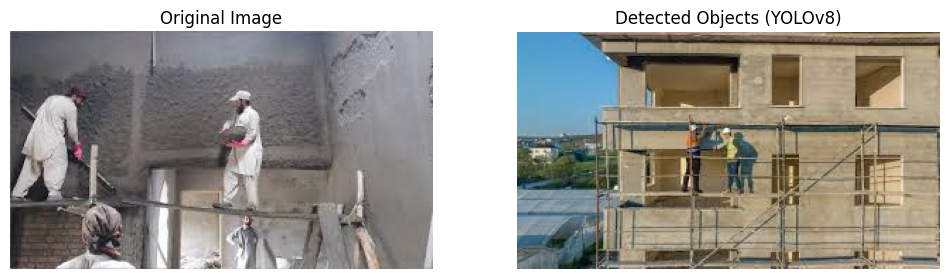

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import os
from PIL import Image
import matplotlib.pyplot as plt

from glob import glob

base_path = '/content/drive/MyDrive/CONSTRUCTION DATASET/YOLOv8_DATA'

predict_dirs = sorted(glob(f'{base_path}/construction_detection*'), key=os.path.getmtime)

output_dir = predict_dirs[-1]  # Latest prediction folder

output_files = os.listdir(output_dir)

for file in output_files:
    if file.endswith(('.jpg', '.png')):
        result_image_path = os.path.join(output_dir, file)
        break

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(Image.open(image_path))
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(Image.open(result_image_path))
axs[1].set_title("Detected Objects (YOLOv8)")
axs[1].axis('off')
plt.show()


In [ ]:
# ✅ Step 5: Load Trained Model for Inference
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Load the best.pt model
trained_model_path = '/content/drive/MyDrive/YOLOv8_DATA/construction_detection/weights/best.pt'
model = YOLO(trained_model_path)

# Upload an image to run inference
uploaded = files.upload()
uploaded_image_path = list(uploaded.keys())[0]


In [ ]:
# ✅ Step 6: Run Inference
import glob

# Run detection
results = model.predict(source=uploaded_image_path, save=True, conf=0.3)

# Find latest prediction folder
output_dirs = sorted(glob.glob('runs/detect/predict*'), key=os.path.getmtime)
output_dir = output_dirs[-1]

# Find predicted image
predicted_image_path = None
for file in os.listdir(output_dir):
    if file.endswith(('.jpg', '.png')):
        predicted_image_path = os.path.join(output_dir, file)
        break


In [ ]:
# ✅ Step 7: Display Results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(Image.open(uploaded_image_path))
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(Image.open(predicted_image_path))
axs[1].set_title("Detected Objects")
axs[1].axis('off')
plt.show()


In [ ]:
!pip install pyqt5 lxml
!git clone https://github.com/tzutalin/labelImg.git
%cd labelImg
!make qt5py3
!python3 labelImg.py
